In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,15]

In [7]:
from image_segmentation_functions import Segmenter

/home/wolterlw/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
bills = !ls ../bills_for_recognition/

X = [cv2.imread('../bills_for_recognition/'+i)[:,:,::-1] for i in bills[:5]]

In [14]:
X[1].shape

(1280, 960, 3)

In [15]:
s = Segmenter()

In [16]:
test_img = X[0]

In [203]:
res,mask = s.process_image(test_img, return_mask=True)

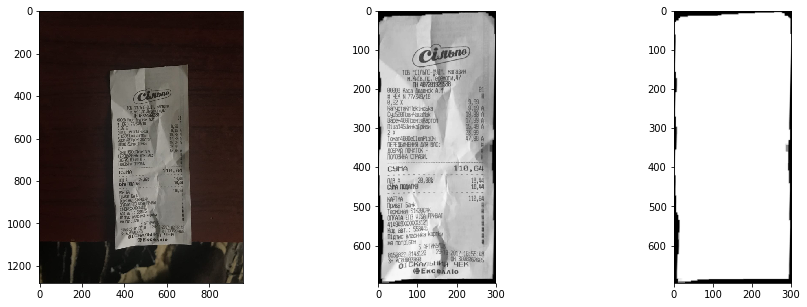

In [18]:
f,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(test_img)
ax[1].imshow(res, cmap='Greys_r')
ax[2].imshow(mask, cmap='Greys_r')

In [19]:
from line_detection_functions import binarize, get_lines

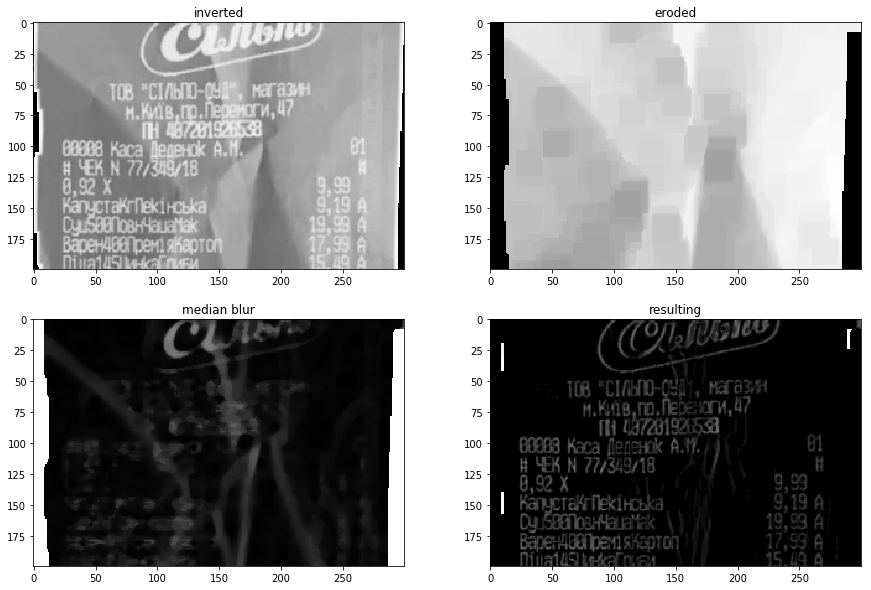

In [20]:
bin_ = binarize(res.astype('uint8'),
                plot=True,
                mask=cv2.erode(mask,
                               np.ones((5, 5)),
                               iterations=7
                )
)

In [21]:
bin_ = (bin_>30).astype('uint8')*bin_

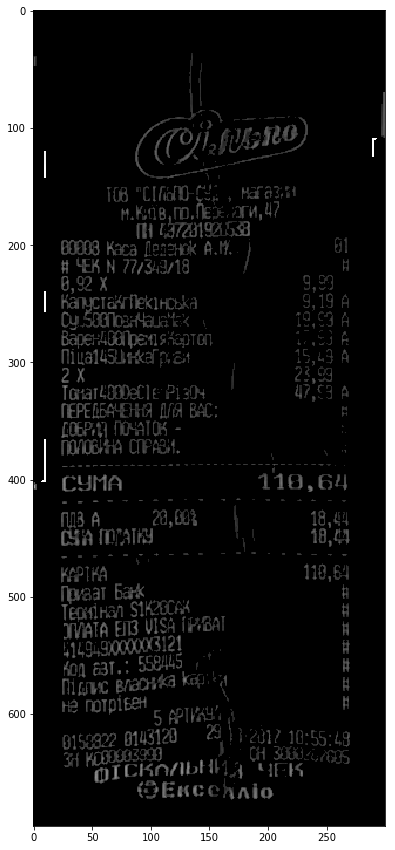

In [22]:
plt.imshow(
    bin_,
    cmap='Greys_r'
)

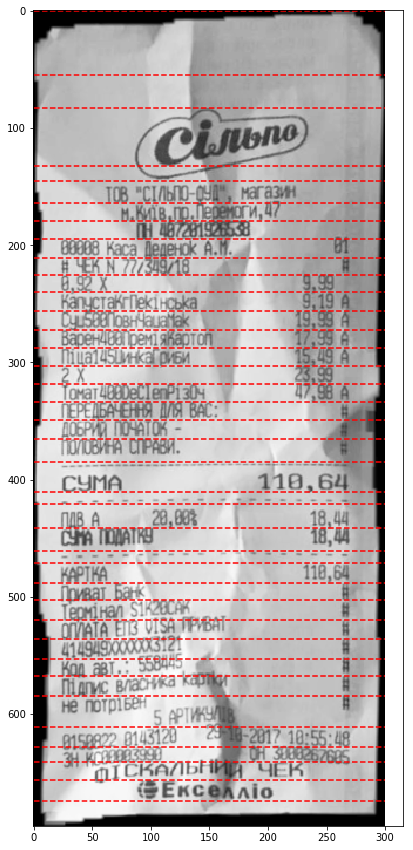

In [204]:
lines = get_lines(bin_, return_coord=True)
plt.imshow(res,
           cmap='Greys_r')
plt.hlines(lines,
           0, 300,
           colors='r',
           linestyles='--')

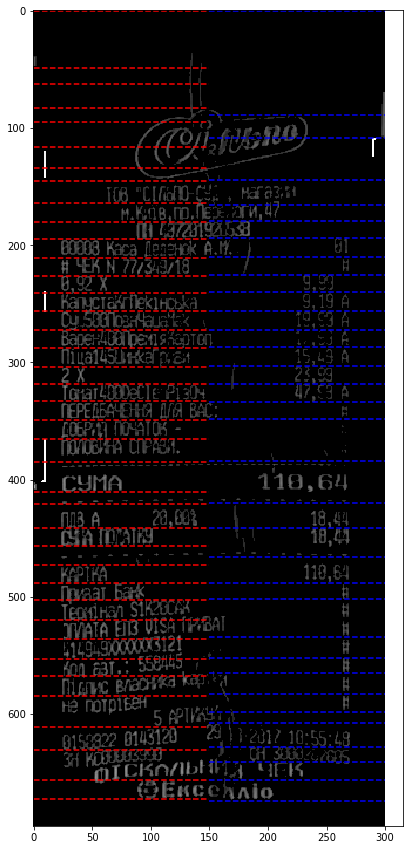

In [24]:
plt.imshow(bin_,cmap='Greys_r')

llines = get_lines(bin_[:,:150], return_coord=True)
rlines = get_lines(bin_[:,150:], return_coord=True)

plt.hlines(llines,
           0 ,150,
           colors='r',
           linestyles='--')
plt.hlines(rlines,
           150 ,300,
           colors='b',
           linestyles='--')

In [ ]:
np_img.tobytes()

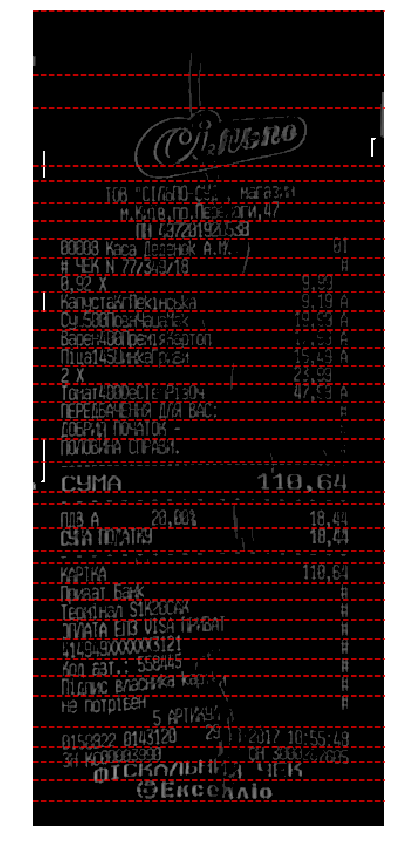

In [145]:
f = plt.figure()

plot = f.add_subplot(111)
plot.axis('off')

plot.set_xlim(0,300)

plot.imshow(bin_,
           cmap='Greys_r')
plot.hlines(lines,
           0, 300,
           colors='r',
           linestyles='--')

np_img = fig2data(f)

In [141]:
def fig2data (fig):
    fig.canvas.draw ( )
 
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer( fig.canvas.tostring_rgb(), dtype=np.uint8 )
    buf = buf.reshape((h,w,3))
    #crop the whitespace
    bnd1 = np.argwhere( buf[:,:,2].min(axis=0)!=255 ).ravel()
    bnd0 = np.argwhere( buf[:,:,2].min(axis=1)!=255 ).ravel()

    return buf[bnd0[0]:bnd0[-1],
               bnd1[0]:bnd1[-1]]

In [148]:
import requests as r

In [205]:
image = open('../bills_for_recognition/3.jpg',mode='rb').read()
payload = {"image": image}

# submit the request
resp = r.post('http://127.0.0.1:5000/predict', files=payload)

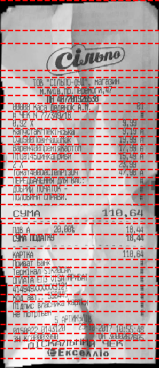

In [206]:
Image.open(io.BytesIO(resp.content))